In [1]:
!pip install matplotlib

In [2]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict



In [6]:
def grapher(logs, encoding, noise):
    # Regex pattern to extract Epoch, Batch, Acc, and Loss
    pattern = r"Epoch: (\d+), Batch: (\d+), Acc: ([\d.]+)%, Loss: ([\d.]+)"

    # Initialize plot
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()

    for log_file in logs:
        epoch_acc = defaultdict(list)
        epoch_loss = defaultdict(list)

        with open(log_file, 'r') as f:
            content = f.read()

        for match in re.finditer(pattern, content):
            epoch = int(match.group(1))
            acc = float(match.group(3))
            loss = float(match.group(4))

            epoch_acc[epoch].append(acc)
            epoch_loss[epoch].append(loss)

        # Compute average accuracy/loss per epoch
        epochs = sorted(epoch_acc.keys())
        avg_acc = [sum(epoch_acc[e]) / len(epoch_acc[e]) for e in epochs]
        # avg_loss = [sum(epoch_loss[e]) / len(epoch_loss[e]) for e in epochs]
        match = re.search(r"(\d+)layers", log_file)
        custom_label = f"{match.group(1)} Layers" if match else log_file
        # label_base = log_file.split("/")[-1].replace(".log", "")
        ax1.plot(epochs, avg_acc, label=f"{custom_label} Accuracy", linewidth=2)
        # ax2.plot(epochs, avg_loss, label=f"{label_base} Loss", linestyle='--', linewidth=2)

    # Labels
    ax1.set_xlabel("Epoch", fontsize=16)
    ax1.set_ylabel("Accuracy (%)", color='blue', fontsize=16)
    ax1.tick_params(axis='y', labelcolor='blue',labelsize=14)
    ax1.tick_params(axis='x',labelsize=14)
    # ax2.set_ylabel("Loss", color='red', fontsize=12)
    # ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f"Training Progress ({encoding}-{noise}): Accuracy and Loss per Epoch", fontsize=16)
    ax1.grid(True)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")
    ax1.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


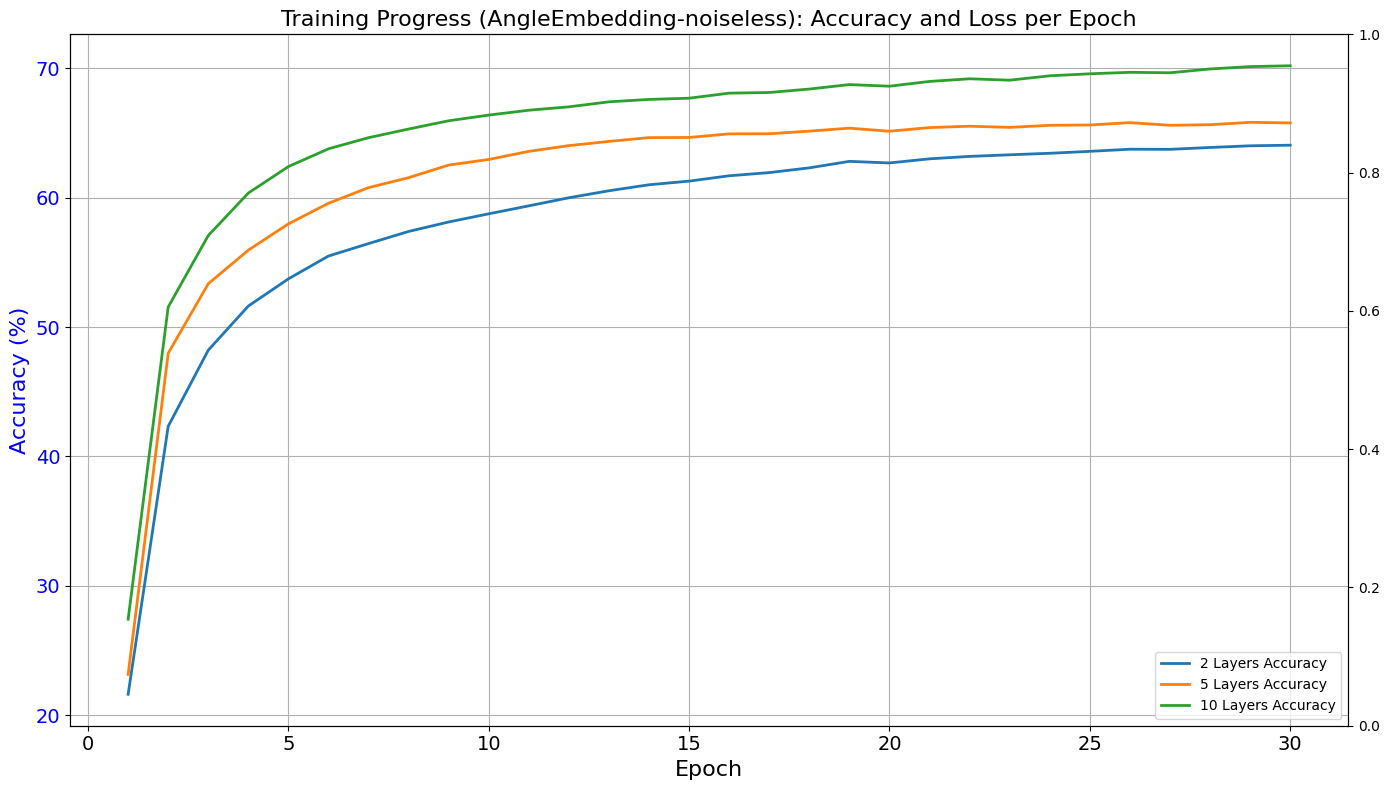

In [7]:
# List of .log file paths
logs = [
    "noiseless-AngleEmbedding-qmlp-mnist-2layers.log",
    "noiseless-AngleEmbedding-qmlp-mnist-5layers.log",
    "noiseless-AngleEmbedding-qmlp-mnist-10layers.log"
    # Add more log file paths here
]
grapher(logs,"AngleEmbedding", "noiseless")

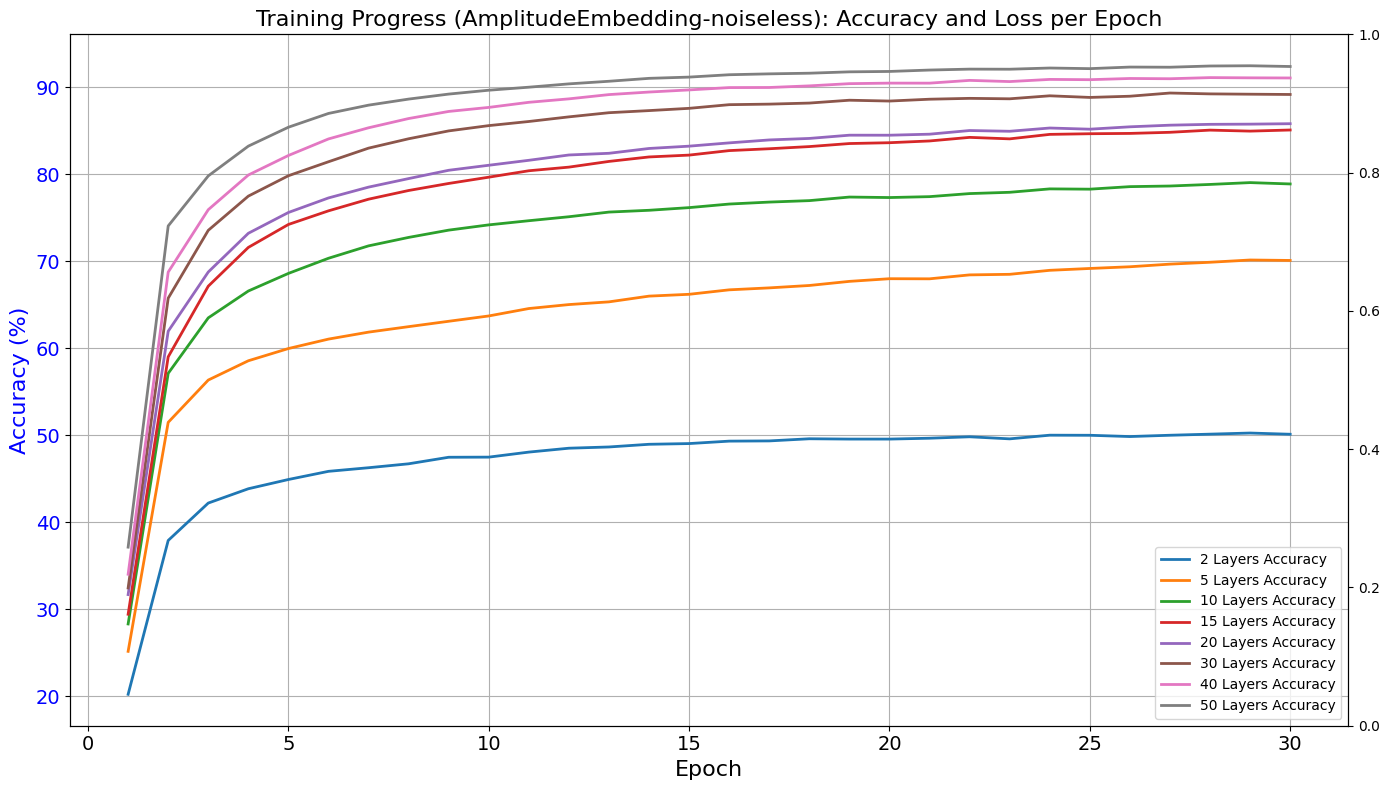

In [8]:
# List of .log file paths
logs1 = [
    "noiselessAmplitudeEmbedding-qmlp-mnist-2layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-5layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-10layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-15layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-20layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-30layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-40layers.log",
    "noiselessAmplitudeEmbedding-qmlp-mnist-50layers.log",
    # Add more log file paths here
]
grapher(logs1,"AmplitudeEmbedding", "noiseless")